In [131]:
#!pip install syntheval

In [132]:
import pandas as pd
import numpy as np

In [133]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
#os.chdir('/users/pgrad/mamu/Documents/first')
os.chdir('D:/maxim/Dissertation/first')

In [134]:
# Load datasets
original_data = pd.read_csv('./datasets/data.csv')
generated_data = pd.read_csv('./llama3-8b/results/synthetic_data_llama_3_8b.csv')

# Subset the datasets to the minimum length
min_len = min(len(original_data), len(generated_data))
original_data = original_data.iloc[:min_len]
generated_data = generated_data.iloc[:min_len]


In [135]:
# import the categories dictionary from json
import json

with open('./evaluation/tools/categories.json') as f:
    categories = json.load(f)

# Initialize the category counts
categories_count = {
    "Respiratory Diseases": 0,
    "Skin Diseases": 0,
    "Endocrine and Metabolic Diseases": 0,
    "Mental and Behavioral Disorders": 0,
    "Cardiovascular Diseases": 0,
    "Gastrointestinal Diseases": 0,
    "Cancers": 0,
    "Neurological Disorders": 0,
    "Musculoskeletal Diseases": 0,
    "Infectious Diseases": 0,
    "Urinary and Reproductive Diseases": 0,
    "Blood Disorders": 0,
    "Genetic Disorders": 0,
    "Miscellaneous": 0
}

# Function to classify diseases into categories and update counts
def classify_disease(disease):
    for category, diseases in categories.items():
        if disease in diseases:
            categories_count[category] += 1
            return category
    return 'Miscellaneous'

In [136]:
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

# One hot encode the disease categories
original_data = pd.concat([original_data, pd.get_dummies(original_data['Disease Category'])], axis=1)
generated_data = pd.concat([generated_data, pd.get_dummies(generated_data['Disease Category'])], axis=1)

# check the columns that are not present in both datasets
original_columns = set(original_data.columns)
generated_columns = set(generated_data.columns)
missing_columns = original_columns.symmetric_difference(generated_columns)
missing_columns

# Add columns of zeros for the missing categories
for column in missing_columns:
    if column not in original_data.columns:
        original_data[column] = 0
    if column not in generated_data.columns:
        generated_data[column] = 0

# Reorder the columns
original_data = original_data.reindex(sorted(original_data.columns), axis=1)
generated_data = generated_data.reindex(sorted(generated_data.columns), axis=1)



In [137]:
original_data

,Age,Blood Disorders,Blood Pressure,Cancers,Cardiovascular Diseases,Cholesterol Level,Cough,Difficulty Breathing,Disease,Disease Category,...,Genetic Disorders,Infectious Diseases,Mental and Behavioral Disorders,Miscellaneous,Musculoskeletal Diseases,Neurological Disorders,Outcome Variable,Respiratory Diseases,Skin Diseases,Urinary and Reproductive Diseases
0,19,0,Low,0,0,Normal,No,Yes,Influenza,Respiratory Diseases,...,0,0,0,0,0,0,Positive,1,0,0
1,25,0,Normal,0,0,Normal,Yes,No,Common Cold,Respiratory Diseases,...,0,0,0,0,0,0,Negative,1,0,0
2,25,0,Normal,0,0,Normal,Yes,No,Eczema,Skin Diseases,...,0,0,0,0,0,0,Negative,0,1,0
3,25,0,Normal,0,0,Normal,Yes,Yes,Asthma,Respiratory Diseases,...,0,0,0,0,0,0,Positive,1,0,0
4,25,0,Normal,0,0,Normal,Yes,Yes,Asthma,Respiratory Diseases,...,0,0,0,0,0,0,Positive,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,80,0,High,0,1,High,No,No,Stroke,Cardiovascular Diseases,...,0,0,0,0,0,0,Positive,0,0,0
344,80,0,High,0,1,High,No,No,Stroke,Cardiovascular Diseases,...,0,0,0,0,0,0,Positive,0,0,0
345,85,0,High,0,1,High,No,No,Stroke,Cardiovascular Diseases,...,0,0,0,0,0,0,Positive,0,0,0
346,85,0,High,0,1,High,No,No,Stroke,Cardiovascular Diseases,...,0,0,0,0,0,0,Positive,0,0,0


In [138]:
# print column names
print(original_data.columns)

Index(['Age', 'Blood Disorders', 'Blood Pressure', 'Cancers',
       'Cardiovascular Diseases', 'Cholesterol Level', 'Cough',
       'Difficulty Breathing', 'Disease', 'Disease Category',
       'Endocrine and Metabolic Diseases', 'Fatigue', 'Fever',
       'Gastrointestinal Diseases', 'Gender', 'Genetic Disorders',
       'Infectious Diseases', 'Mental and Behavioral Disorders',
       'Miscellaneous', 'Musculoskeletal Diseases', 'Neurological Disorders',
       'Outcome Variable', 'Respiratory Diseases', 'Skin Diseases',
       'Urinary and Reproductive Diseases'],
      dtype='object')


In [139]:

print(original_data.shape)
print(generated_data.shape)

(348, 25)
(348, 25)


In [140]:
# Fill missing values with 0 for numerical columns
original_data = original_data.fillna(0)
generated_data = generated_data.fillna(0)

# Ensure all columns expected to be numerical are converted to numerical data types
numerical_columns = original_data.select_dtypes(include=['float64', 'int64']).columns

original_data[numerical_columns] = original_data[numerical_columns].apply(pd.to_numeric)
generated_data[numerical_columns] = generated_data[numerical_columns].apply(pd.to_numeric)

# Verify data types again
data_types_original = original_data.dtypes
data_types_generated = generated_data.dtypes

original_data.drop(columns=['Disease'], inplace=True)
generated_data.drop(columns=['Disease'], inplace=True)

data_types_original, data_types_generated

(Age                                   int64
 Blood Disorders                       uint8
 Blood Pressure                       object
 Cancers                               uint8
 Cardiovascular Diseases               uint8
 Cholesterol Level                    object
 Cough                                object
 Difficulty Breathing                 object
 Disease                              object
 Disease Category                     object
 Endocrine and Metabolic Diseases      uint8
 Fatigue                              object
 Fever                                object
 Gastrointestinal Diseases             uint8
 Gender                               object
 Genetic Disorders                     uint8
 Infectious Diseases                   uint8
 Mental and Behavioral Disorders       uint8
 Miscellaneous                         uint8
 Musculoskeletal Diseases              uint8
 Neurological Disorders                uint8
 Outcome Variable                     object
 Respirato

In [141]:
# Separate the original into 80 20

original_data_train = original_data.iloc[:int(0.8 * len(original_data))]
original_data_test = original_data.iloc[int(0.8 * len(original_data)):]

In [142]:
features = ['Blood Disorders', 'Cancers',
       'Cardiovascular Diseases', 'Endocrine and Metabolic Diseases',
       'Gastrointestinal Diseases', 'Genetic Disorders', 'Infectious Diseases',
       'Mental and Behavioral Disorders', 'Miscellaneous',
       'Musculoskeletal Diseases', 'Neurological Disorders',
       'Respiratory Diseases', 'Skin Diseases',
       'Urinary and Reproductive Diseases']

In [143]:
# print dimensions
print(original_data.shape)
print(generated_data.shape)

(348, 24)
(348, 24)


SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: pca:   6%|▌         | 1/17 [00:00<00:05,  2.85it/s]d:\Program Fil\Python\Python311\Lib\site-packages\syntheval\utils\plot_metrics.py:76: UserWarning: 
The palette list has fewer values (11) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=fakes[components[0]], y=fakes[components[1]], hue=fakes['target'], ax=ax2, palette=sns.color_palette("colorblind",class_num))
Syntheval: h_dist:  35%|███▌      | 6/17 [00:10<00:24,  2.19s/it]   d:\Program Fil\Python\Python311\Lib\site-packages\syntheval\metrics\utility\metric_hellinger_distance.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)
Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:11<00:05,  1.24it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: dcr:  71%|███████   | 12/17 [00:12<00:03,  1.49it/s]    d:\Program Fil\Python\Python311\Lib\site-packages\syntheval\metrics\privacy\metric_distance_closest_record.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  dcr = mut_nn/int_nn
Syntheval: att_discl:  82%|████████▏ | 14/17 [00:12<00:01,  1.80it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:15<00:00,  1.08it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0586  0.0062   |
| PCA difference in eigenvalues (exp. var.):   0.0085           |
| PCA angle between eigenvectors (radians) :   1.0226           |
| Average confidence interval overlap      :   0.1725  0.1038   |
|   -> # non-overlapping COIs at 95%       :    9               |
|   -> fraction of non-overlapping CIs     :   0.7500           |
| Mixed correlation matrix difference      :   2.9316           |
| Pairwise mutual information difference   :   2.7911           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0894  0.0185   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0699  0.0167   |
|       -> avg. Total Variation Distance   :   0.1089  0.0330   |
|   -> average combined p-val

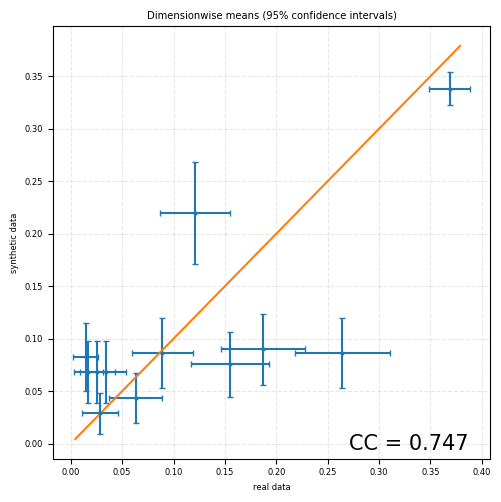

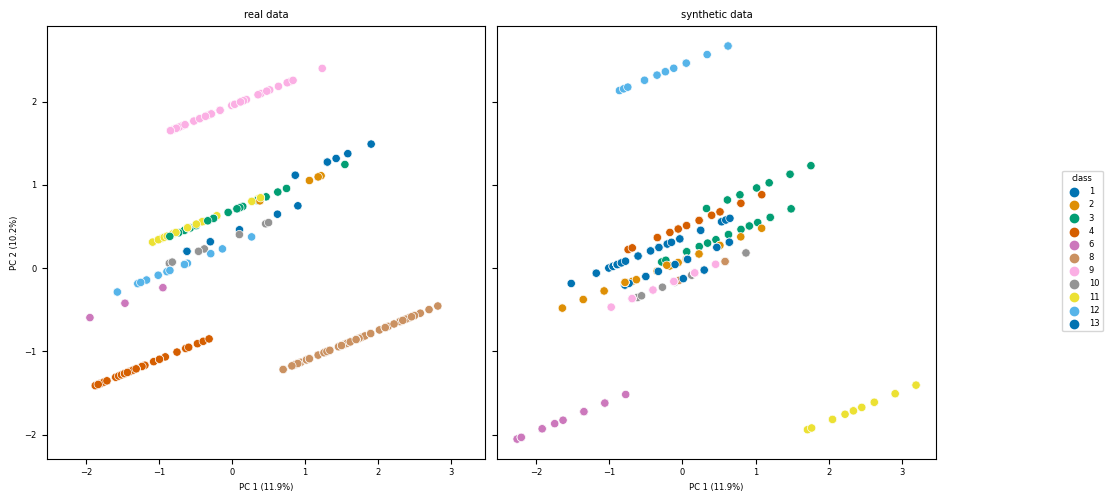

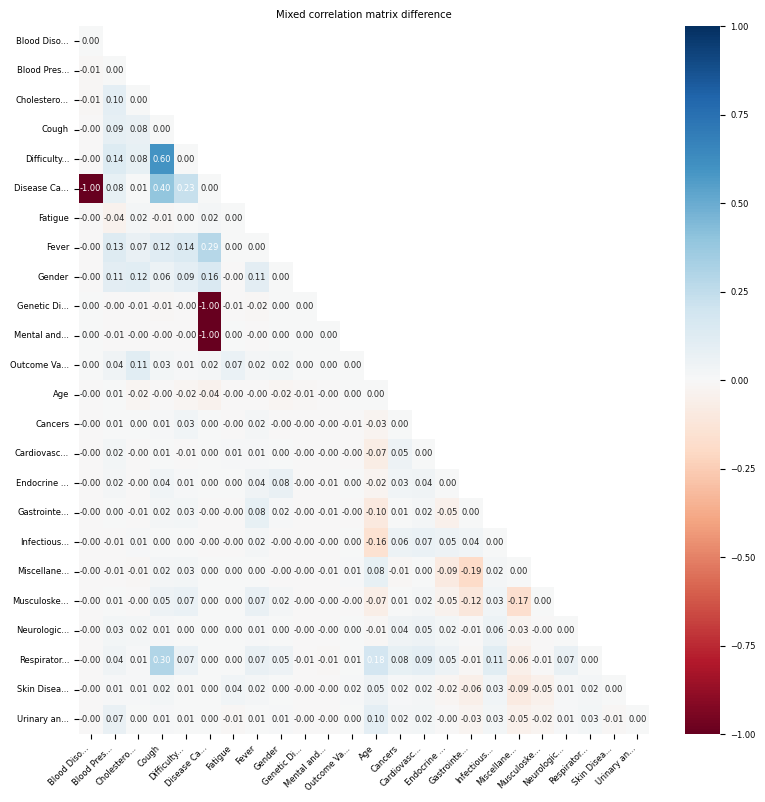

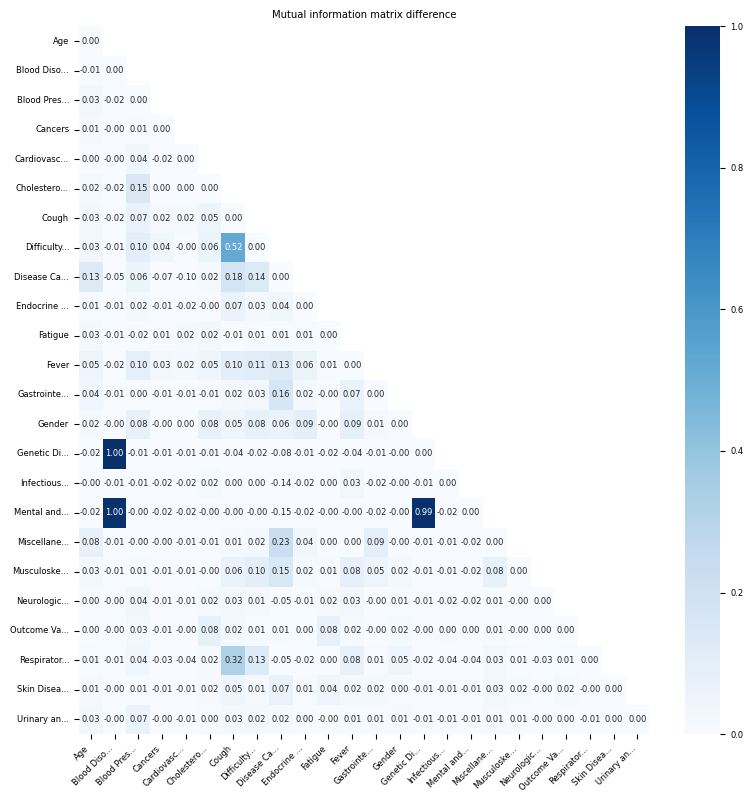

In [144]:
from syntheval import SynthEval

evaluator = SynthEval(generated_data)
_ = evaluator.evaluate(original_data_train, 'Disease Category', "full_eval")